In [1]:
import matplotlib
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}
matplotlib.rc('font', **font)
# matplotlib.rcParams['lines.markersize'] = 3
import numpy as np
import matplotlib.pyplot as plt
import collections
import FigureMove as Fig
import auxiliary_functions as aux
import importlib
import FourierClass as FC
import importlib
importlib.reload(FC)

[100, 150] [0.5, 0.5, 0.5] [1.0, 1.0, 1.0]


<module 'FourierClass' from '/ll1701/kristian/analysis/analyze_bubblepaper/FourierClass.py'>

In [2]:
s = np.sqrt(3.)
kL = 1/s #1/s
kinj = 40 #270#40#15 #8
kcrit = 80 #675#80 #20
a = 0.
b = -11./3.
c = 0.
spaceDim = 1
fieldDim = 1

n = 128

L = 7
delta = L / n
n_pad = 0
# sigma_to_be = ((4.15e-7)**2)
sigma_to_be = 1e-7#((4.15e-7)**2)#1.5e4
realFT = False

powerspec = False
binTypeCalc = 'median'

NBins = 100
scatterData = False
numthreads = 32
scatterShowN = 10000
profileParameters = [2.50330693e-05, 4.88035592e-02, 0.8]

In [8]:
def getMagneticField(spaceDim, fieldDim, n, delta, onlyprofile, **kwargs):#kL=1/np.sqrt(3), kinj=40, kcrit=80, a=0, b=-11./3., c=0):
    magnetic = FC.FourierTransformObj(spaceDim, fieldDim, n, delta, **kwargs)
    magnetic.initializeKVectors(ignoreTwoPi=False)
    magnetic.initializeXVectors()
    if not onlyprofile:
	    magnetic.initializeFieldND()
#     print(magnetic.kspace(inplace=False))
    magnetic.addProfileFieldND()
    return magnetic

spetrum with parameters: kL= 0.5773502691896258  kinj= 40  kcrit= 80  a= 0.0  b= -3.6666666666666665 c= 0.0 A= None
using following parameters for profile:  [2.50330693e-05, 0.0488035592, 0.8]
already in rspace!
average field/prof 0.0
bin data: shapes x,y (65,) (65,)
no factor, would be:  0.24683294280214338
multiplying profile function with Discrete FFT factor!, assuming same spacing of coords in all directions
bin data: shapes x,y (65,) (65,)


/ll1701/kristian/analysis/analyze_bubblepaper/FigureMove.py:3787: UserWarning: setting MIN from 0 to 0.897598 to use log
  warnings.warn('setting MIN from %g to %g to use log' %(minEarly,MIN))
/home/kristian/ArepoR/yt-conda/envs/py365SecTry/lib/python3.6/site-packages/numpy/lib/function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


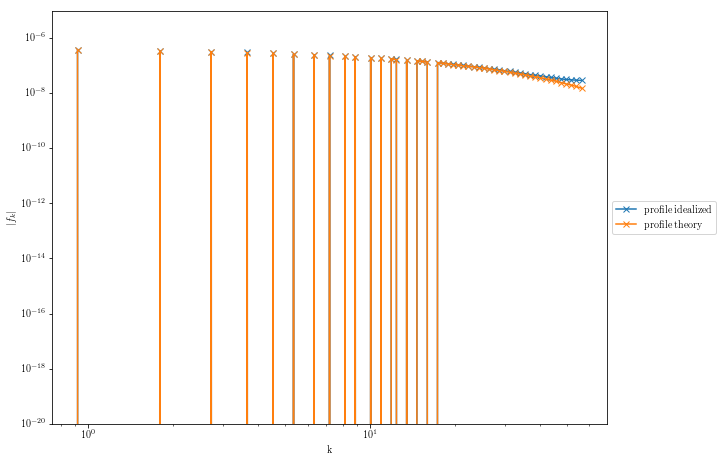

In [9]:
fig, ax = Fig.getFigure(legendExternal=1)
magnetic = getMagneticField(spaceDim, fieldDim, n, delta, onlyprofile=True, profileParameters=profileParameters, sigma_to_be=sigma_to_be, kL=kL, kinj=kinj, kcrit=kcrit, a=a, b=b, c=c, n_pad=n_pad, realFT=realFT)
magnetic.plotFT(marker='x', ax=ax, factor=1/np.sqrt(8*np.pi)*(np.sqrt(n/(2*np.pi))*delta)**spaceDim, powerspec=powerspec, label='profile idealized',binTypeCalc=binTypeCalc, scatterData=scatterData, NBins=NBins)
magnetic.plotProfPS(marker='x', ax=ax, factor=1/np.sqrt(8*np.pi), powerspec=powerspec, label='profile theory',binTypeCalc=binTypeCalc, scatterData=scatterData, NBins=NBins)
if powerspec:
	ylabel = r'$k^2 {f_k}^2$'
else:
	ylabel = r'$|{f_k}|$'	
Fig.modifyPlot(ax, xlog=1, ylog=1, xlabel='k', ylabel=ylabel)
ax.legend(frameon=True, loc='center left', framealpha=.8, fancybox=True, bbox_to_anchor=(1,0.5))
ax.set_ylim([1e-20,1e-5])
plt.show()


already in rspace!
already in rspace!
bin data: shapes x,y (128,) (128,)
bin data: shapes x,y (128,) (128,)


/ll1701/kristian/analysis/analyze_bubblepaper/FigureMove.py:3787: UserWarning: setting MIN from 0 to 0.0546875 to use log
  warnings.warn('setting MIN from %g to %g to use log' %(minEarly,MIN))


(0.0001, 1.0)

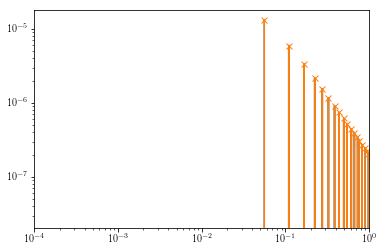

In [5]:
magnetic.rspace()
magnetic.plotIFT()
magnetic.plotProf(marker='x')
plt.yscale('log')
plt.xscale('log')
plt.xlim([1e-4,1e0])

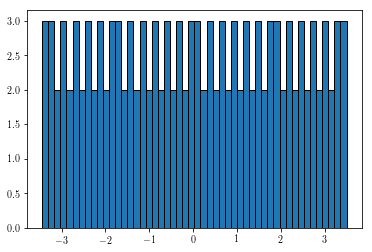

In [6]:
plt.hist(magnetic.xs[0], bins=50, edgecolor='k');

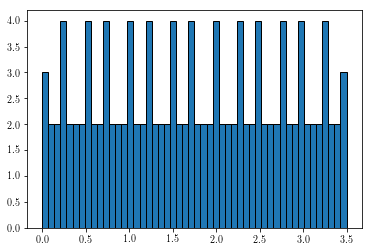

In [7]:
plt.hist(magnetic.xabs, bins=50, edgecolor='k');

## Testing influence of rescaled profile on Fourier Transform

In [126]:
import matplotlib
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}
matplotlib.rc('font', **font)
# matplotlib.rcParams['lines.markersize'] = 3
import numpy as np
import matplotlib.pyplot as plt
import collections
import FigureMove as Fig
import auxiliary_functions as aux
import importlib
import FourierClass as FC
import importlib
importlib.reload(FC)

<module 'FourierClass' from '/ll1701/kristian/analysis/analyze_bubblepaper/FourierClass.py'>

In [127]:
s = np.sqrt(3.)
kL = 1/s #1/s
kinj = 40 #270#40#15 #8
kcrit = 80 #675#80 #20
a = 0.
b = -11./3.
c = 0.
spaceDim = 3
fieldDim = 1

n = 128

L = 0.4
delta = L / n
n_pad = 0
# sigma_to_be = ((4.15e-7)**2)
sigma_to_be = 1e-7#((4.15e-7)**2)#1.5e4
realFT = False

powerspec = True
binTypeCalc = 'median'

NBins = 100
scatterData = False
numthreads = 32
scatterShowN = 10000
profileParameters = [2.50330693e-05, 4.88035592e-02, 0.8]

In [137]:
def getMagneticField(spaceDim, fieldDim, n, delta, onlyprofile, **kwargs):#kL=1/np.sqrt(3), kinj=40, kcrit=80, a=0, b=-11./3., c=0):
    magnetic = FC.FourierTransformObj(spaceDim, fieldDim, n, delta, **kwargs)
    magnetic.initializeKVectors(ignoreTwoPi=True)
    magnetic.initializeXVectors()
    if not onlyprofile:
	    magnetic.initializeFieldND(rescaleAsProfile=True)
#     print(magnetic.kspace(inplace=False))
#     magnetic.addProfileFieldND()
    return magnetic

spetrum with parameters: kL= 0.5773502691896258  kinj= 40  kcrit= 80  a= 0.0  b= -3.6666666666666665 c= 0.0 A= None
powerspec:kL,kinj,kcrit,A,a,b,c 0.5773502691896258 40 80 1.0 0.0 -3.6666666666666665 0.0
---------------using sigma_to_be:  1e-07
np.shape(self.doIFFT(rand0))
np.shape(rand0)
np.shape(self.rescaleProfile[None,:] * self.doIFFT(rand0))
(128, 128, 128)
(128, 128, 128)
(1, 128, 128, 128)
already in kspace!
bin data: shapes x,y (2097152,) (2097152,)
already in kspace!
bin data: shapes x,y (2097152,) (2097152,)
powerspec:kL,kinj,kcrit,A,a,b,c 0.5773502691896258 40 80 5.586295089745105e-07 0.0 -3.6666666666666665 0.0
plotTheoPS: sum field:  0.03760664882978143
bin data: shapes x,y (2097152,) (2097152,)


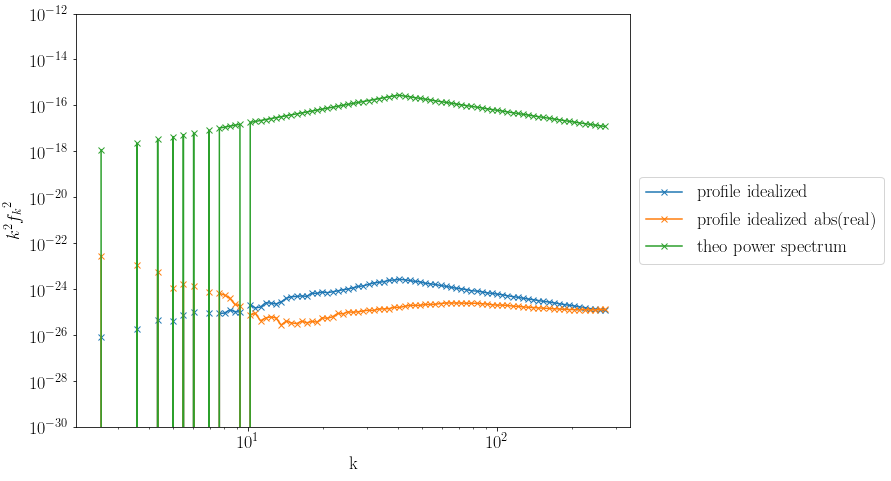

In [138]:
fig, ax = Fig.getFigure(legendExternal=1)
magnetic = getMagneticField(spaceDim, fieldDim, n, delta, onlyprofile=False, profileParameters=profileParameters, sigma_to_be=sigma_to_be, kL=kL, kinj=kinj, kcrit=kcrit, a=a, b=b, c=c, n_pad=n_pad, realFT=realFT)
magnetic.plotFT(absTrafo=False, marker='x', ax=ax, factor=1/np.sqrt(8*np.pi)*(np.sqrt(n/(2*np.pi))*delta)**spaceDim, powerspec=powerspec, label='profile idealized',binTypeCalc=binTypeCalc, scatterData=scatterData, NBins=NBins)
magnetic.plotFT(absTrafo=True, marker='x', ax=ax, factor=1/np.sqrt(8*np.pi)*(np.sqrt(n/(2*np.pi))*delta)**spaceDim, powerspec=powerspec, label='profile idealized abs(real)',binTypeCalc=binTypeCalc, scatterData=scatterData, NBins=NBins)
magnetic.plotTheoPS(marker='x', ax=ax, factor=1/np.sqrt(8*np.pi)*(np.sqrt(n/(2*np.pi))*delta)**spaceDim, powerspec=powerspec, label='theo power spectrum',binTypeCalc=binTypeCalc, scatterData=scatterData, NBins=NBins)
# magnetic.plotProfPS(marker='x', ax=ax, factor=1/np.sqrt(8*np.pi), powerspec=powerspec, label='profile theory',binTypeCalc=binTypeCalc, scatterData=scatterData, NBins=NBins)
if powerspec:
	ylabel = r'$k^2 {f_k}^2$'
else:
	ylabel = r'$|{f_k}|$'	
Fig.modifyPlot(ax, xlog=1, ylog=1, xlabel='k', ylabel=ylabel)
ax.legend(frameon=True, loc='center left', framealpha=.8, fancybox=True, bbox_to_anchor=(1,0.5))
ax.set_ylim([1e-30,1e-12])
plt.show()


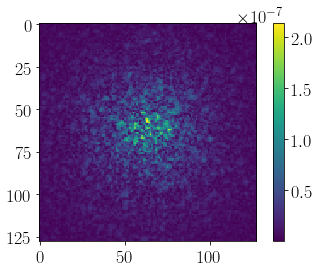

In [139]:
plt.imshow((magnetic.rspace(inplace=False).real[0][0][int(n/2)]))
plt.colorbar()

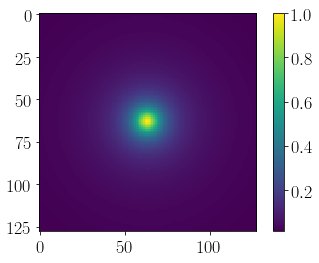

In [98]:
plt.imshow(magnetic.rescaleProfile)
plt.colorbar()

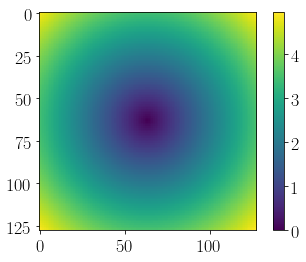

In [63]:
plt.imshow(magnetic.xabs)
plt.colorbar()

ValueError: x and y must have same first dimension, but have shapes (128, 128) and (16384,)

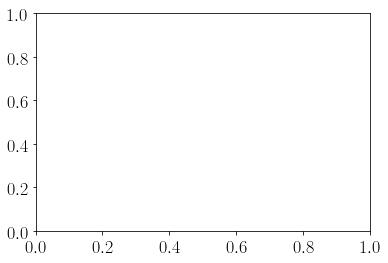

In [44]:
plt.plot(magnetic.xabs, magnetic.rspace(inplace=False).flatten())

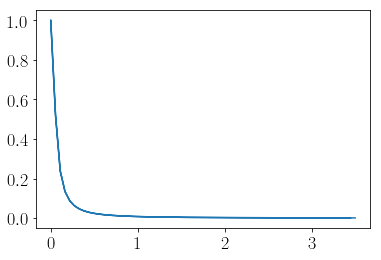

In [36]:
plt.plot(magnetic.xabs, magnetic.rescaleProfile)

In [ ]:
initializeField1D